This is a continuation of the Finding Distribution notebook. In this, I add Rayleigh noise to the VOC2012 data.

In [17]:
from PIL import Image
from scipy import stats as st
from astropy.io.fits import getdata
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def get_png_data(filename):
    """
    Get the PNG data for the given FITS file
    
    Args:
        filename: Path to the FITS file
    """
    data = getdata(filename)
    data = data.byteswap().newbyteorder()
    
    file = Image.fromarray(data)
    file = file.convert('L')  # black and white
    file.save('test.png')
    
    png_data = Image.open('test.png')
    png_data = np.array(png_data)
    
    return png_data

In [5]:
files = os.listdir('VOC2012/JPEGImages')

In [6]:
from ipywidgets import FloatProgress
from IPython.display import display

(225, 400)


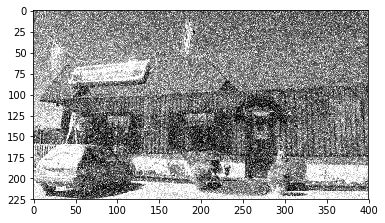

In [83]:
# Experiment
img_index = 19
data = np.array(Image.open('VOC2012/JPEGImages/' + files[img_index]))[:,:,0]
#plt.imshow(data);
noise = st.rayleigh.rvs(loc=-50.90199985022714, scale=71.70478968403172, size=data.shape)
print(np.array(data).shape)  # Well this is annoying
im = (np.array(data) + noise)
plt.imshow(im);

im = Image.fromarray(im)
im = im.convert('L')
plt.imshow(im);
im.save('test2.png')

In [86]:
# from https://stackoverflow.com/a/41457700/2713263
f = FloatProgress(min=0, max=17125) # instantiate the bar, 17125 = image count
display(f) # display the bar

for file in files:
    data = np.array(Image.open('VOC2012/JPEGImages/' + file))[:,:,0]  # Use only R channel
    # loc and scale from the Finding Distribution notebook
    noise = st.rayleigh.rvs(loc=-50.90199985022714, scale=71.70478968403172, size=data.shape)
    
    # Also save the raw R channel image
    red = Image.fromarray(data)
    red = red.convert('L')
    red.save('VOC2012/red_channel/' + file.split('.')[0] + '.png')
    
    # Add the noise and save
    im = data + noise
    im = Image.fromarray(im)
    im = im.convert('L')
    im.save('VOC2012/rayleigh/' + file.split('.')[0] + '.png')
    
    f.value += 1

FloatProgress(value=0.0, max=17125.0)